# 1. Imports

In [1]:
#Import all packages that will be used during this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data

In [2]:
#Load the file generated from data wrangling and cleaning.
file = 'Asteroid_Clean.csv'
df = pd.read_csv(file, sep=',', index_col=0)

In [3]:
#Verify that the data loaded correctly.
df.head().T

,0,1,2,3,4
semi-major_axis(au),2.76917,2.77247,2.66915,2.36142,2.57425
eccentricity,0.076009,0.230337,0.256942,0.0887215,0.191095
x-y_inclination(deg),10.5941,34.8362,12.9889,7.14177,5.36699
longitude_asc_node,80.3055,173.08,169.853,103.811,141.577
argument_perihelion,73.5977,310.049,248.139,150.729,358.688
perihelion_dist(au),2.55868,2.13386,1.98333,2.15191,2.08232
aphelion_dist(au),2.97965,3.41107,3.35497,2.57093,3.06617
orbital_period,4.6082,4.61644,4.36081,3.62884,4.13032
data_arc(d),8822,72318,72684,24288,63507
condition_code,0,0,0,0,0


# 3. Exploring the Data

### 3.1 Exploring Asteroid Classifications

#### 3.1.1 Which variables are categorical?

In [12]:
data_type = df.dtypes
data_type[(data_type == 'object')|(data_type == 'category')].index.tolist()

['near_earth_obj', 'physically_hazardous_asteroid', 'class']

#### 3.1.2 What determines how an asteroid is classified?

A common unit in astronomy is the astronomical unit (au), and is roughly equal to the distance from the Earth to the Sun or 150 million kilometers.

Near Earth Object (NEO) : An asteroid or comet that is less than 1.3 au from the sun.

Physically Hazardous: Determined by whether it is an NEO and its size.

Class: This is the orbit class, such as if it is part of the main asteroid belt, orbits a larger planet, or is near earth.


Resources: 

NEO Basics, Jet Propulsion Lab, https://cneos.jpl.nasa.gov/about/neo_groups.html

Asteroids, NASA Science - Solar System Explorations, https://solarsystem.nasa.gov/asteroids-comets-and-meteors/asteroids/in-depth/

#### 3.1.3 The relationship between the classifiers and the target.

Since the physically hazardous classifer is based on the target, it cannot be used for modeling.

The NEO classifer is represented within the more specific classifer of orbit class, so the NEO classifer is not needed for further exploration.

In [13]:
drop_list = ['near_earth_obj', 'physically_hazardous_asteroid']
df.drop(drop_list, axis=1, inplace=True)

#### 3.1.4 Oribit Class

Let's see how diamteter is distributed by orbit class.

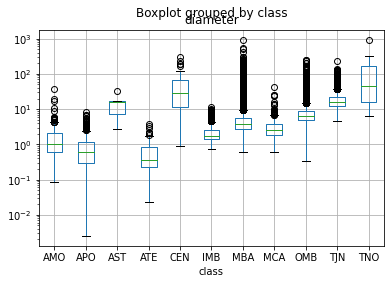

In [14]:
df.boxplot(by='class',column='diameter');

#The log scale is added because initially could only see the upper quadrant. 
plt.yscale('log')

C:\Users\eboci_000\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eboci_000\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


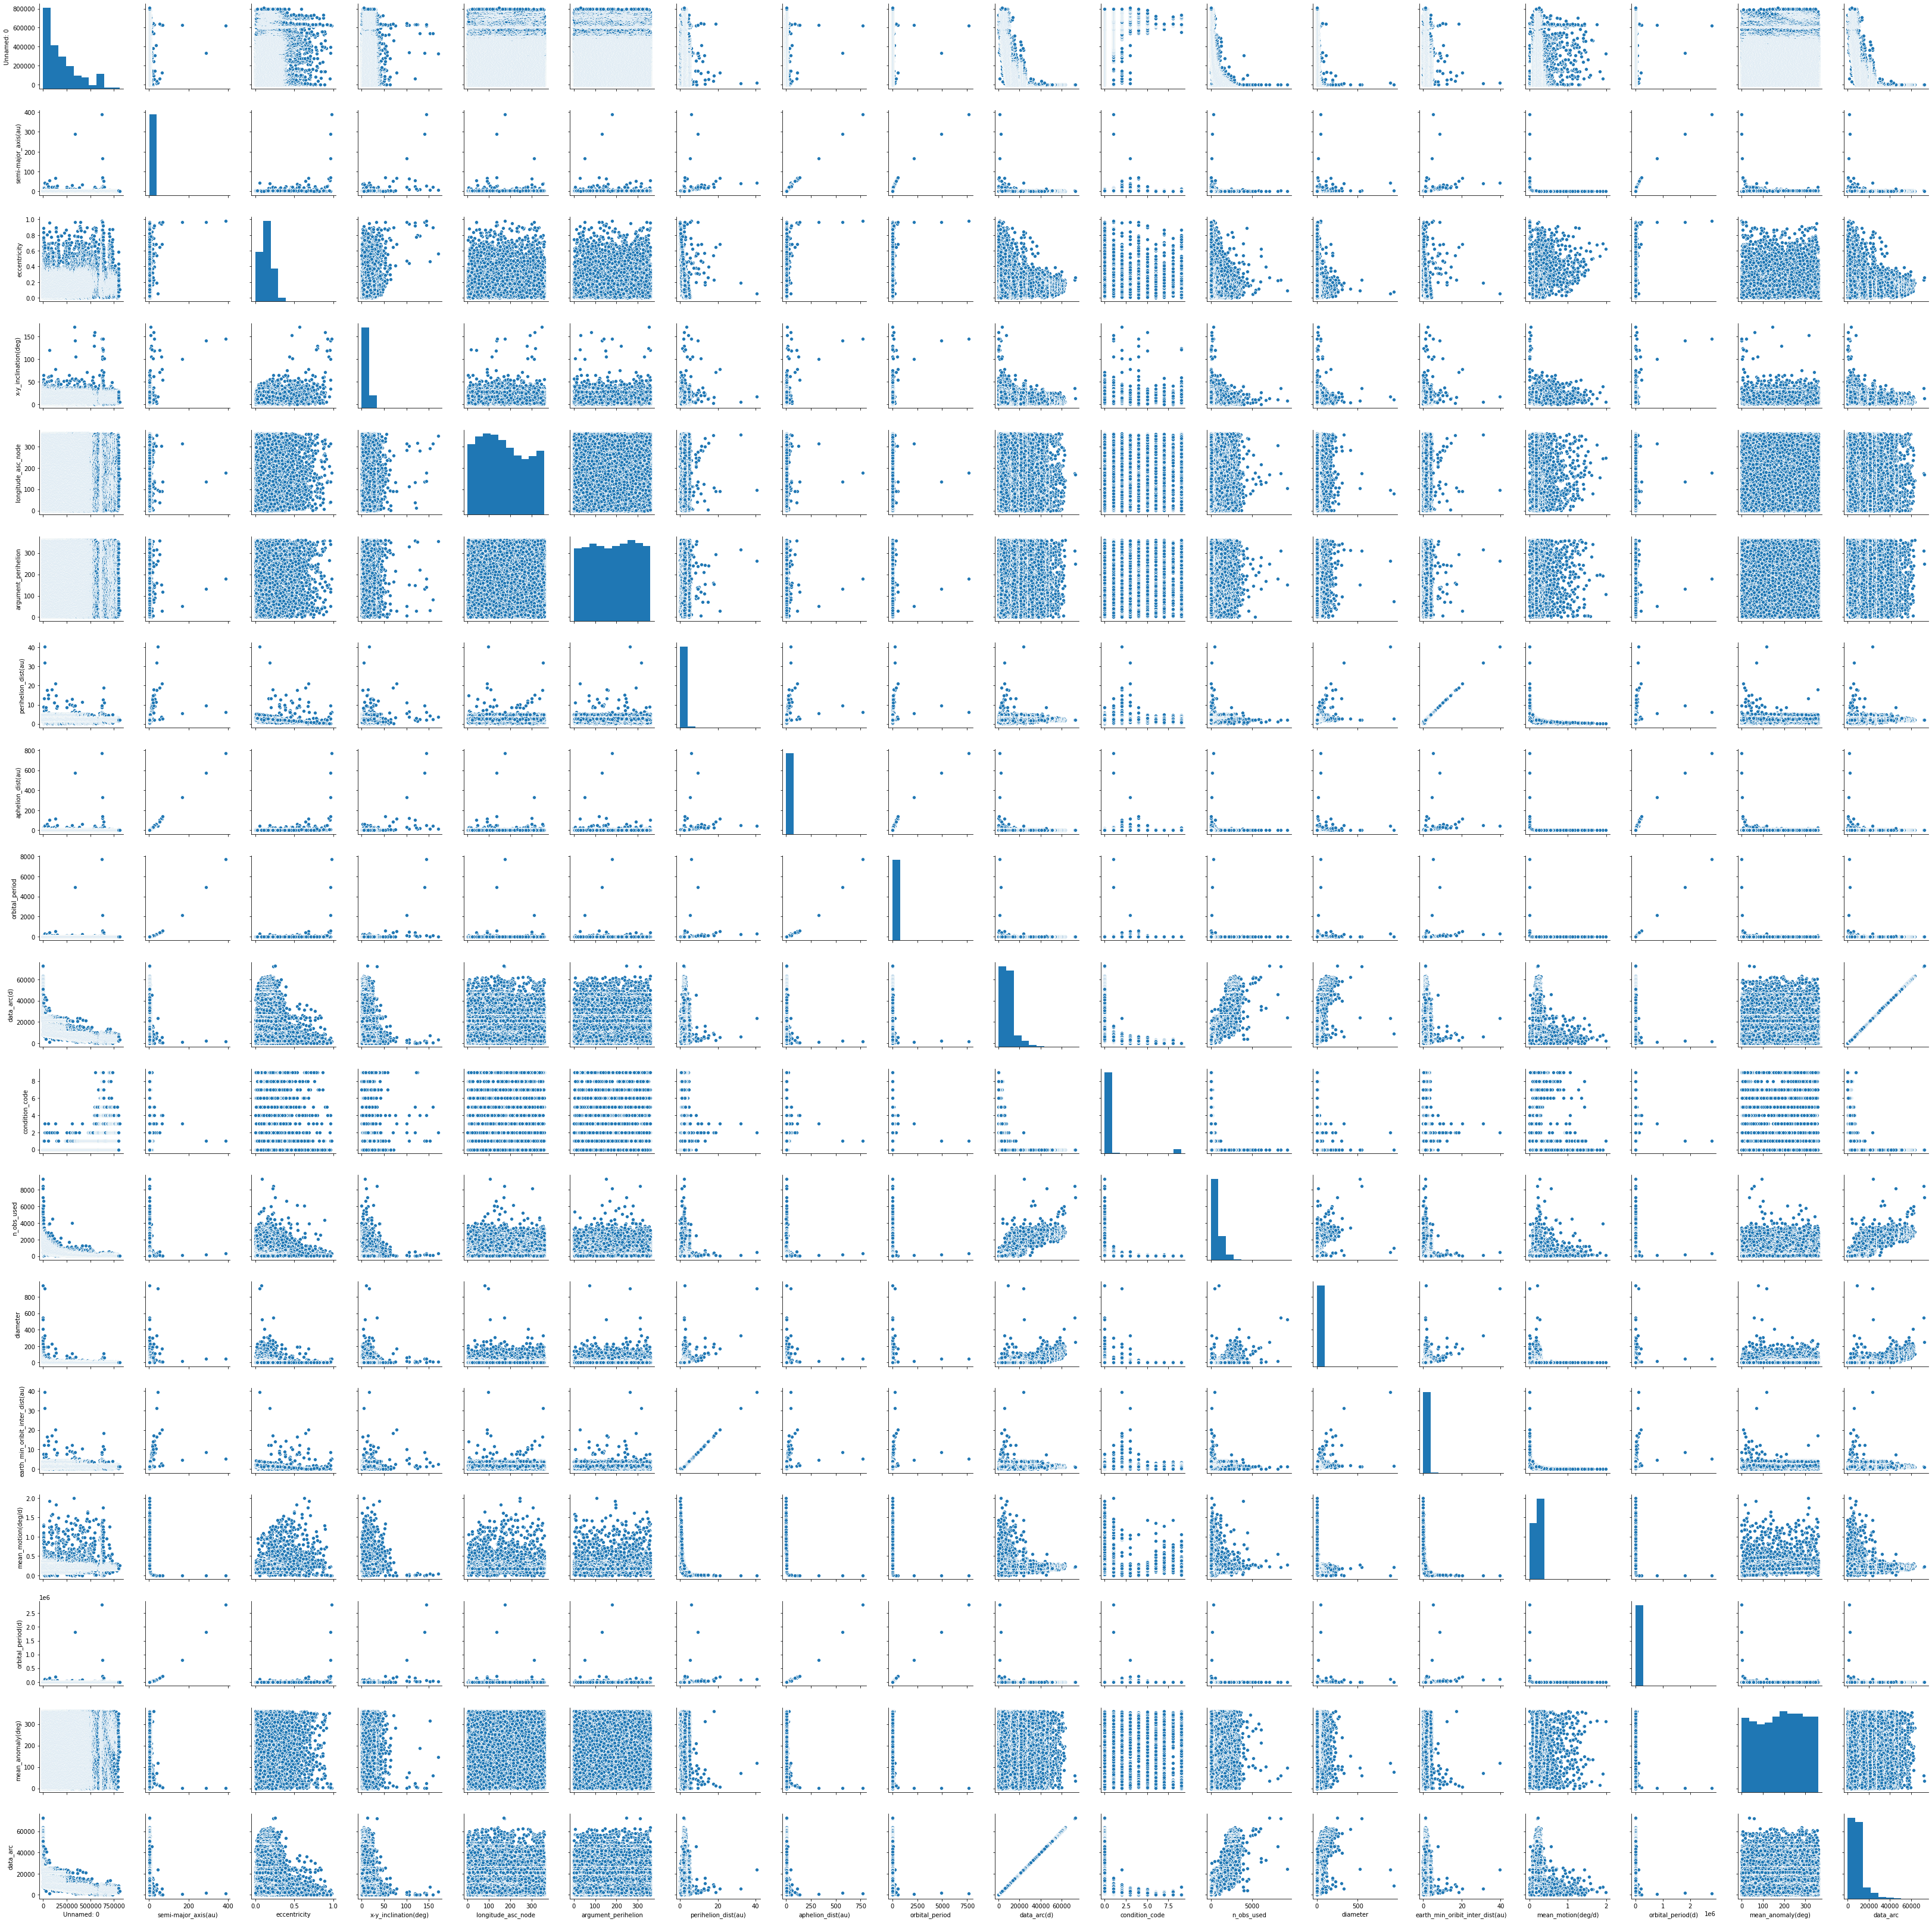

In [20]:
sns.pairplot(df)

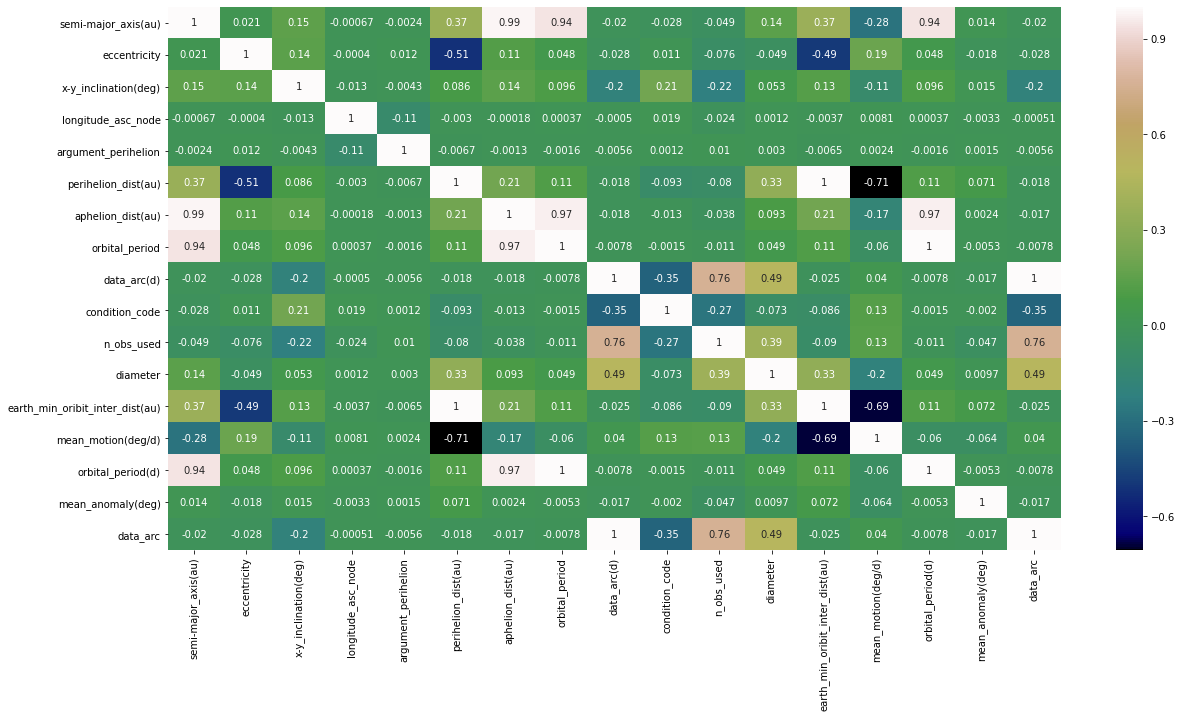

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap='gist_earth');